# Plotting PyPSA results (simplified version 4-nodes clustering and 1 year data - Bolivia)

In [74]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 0 folder(s) up.


In [75]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

# Load all networks

In [76]:
# add_electricity_network = os.getcwd() + '/networks/elec.nc'
# n_add_el = pypsa.Network(add_electricity_network)

# clustered_network = os.getcwd() + '/networks/elec_s_20.nc'
# n_cluster = pypsa.Network(clustered_network)



#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

solved_network = os.getcwd() + "/results/networks/elec_s_4_ec_lcopt_Co2L-1H.nc"

base_network= os.getcwd() +  "/networks/base.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_base= pypsa.Network(base_network)

n_solve = pypsa.Network(solved_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers


INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


# Base network

In [77]:
n_base

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 155
 - Line: 322
 - Transformer: 39
Snapshots: 8760

(<matplotlib.collections.PatchCollection at 0x2eda93ac880>,
 <matplotlib.collections.LineCollection at 0x2edaa6ea380>)

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


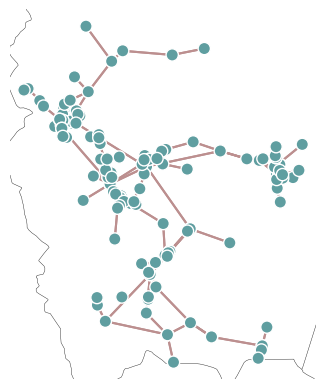

In [78]:
n_base.plot()

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


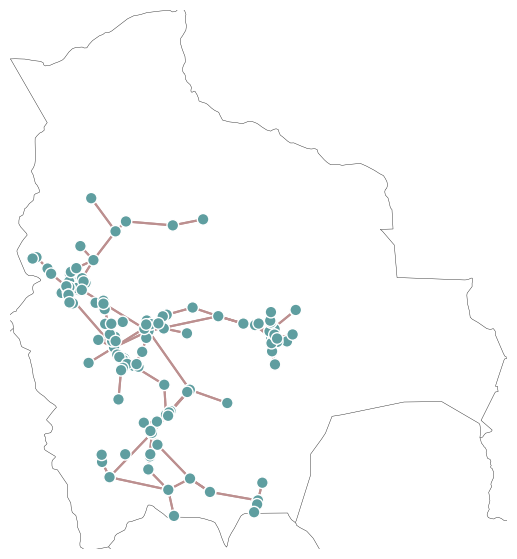

In [79]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#countries = ["Bolivia"]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_base.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


### Conections between buses 

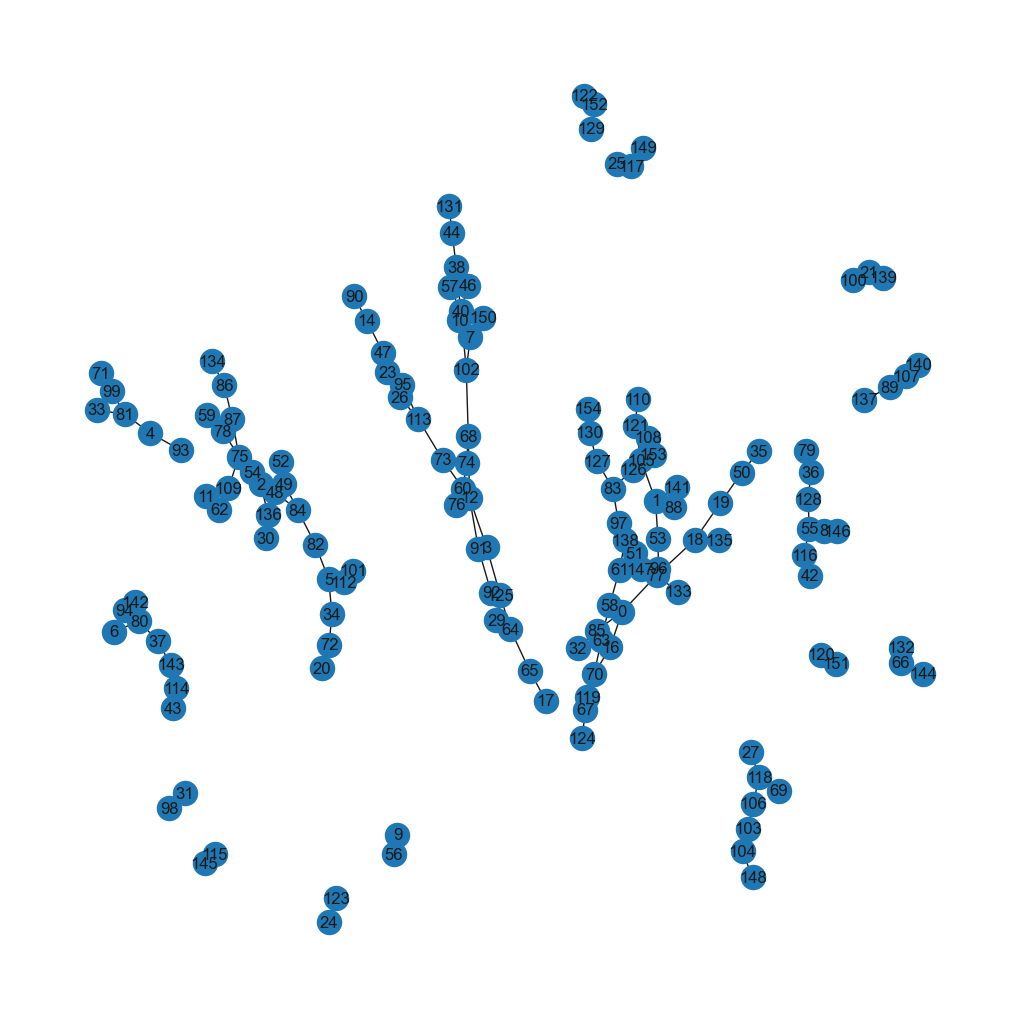

In [80]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 2,
    'width': 3,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    pos[i] = [df_buses.lon[i], df_buses.lat[i]]



pos = nx.shell_layout(G)

plt.figure(figsize=(10, 10))
fig1 = nx.draw(G, with_labels=True)

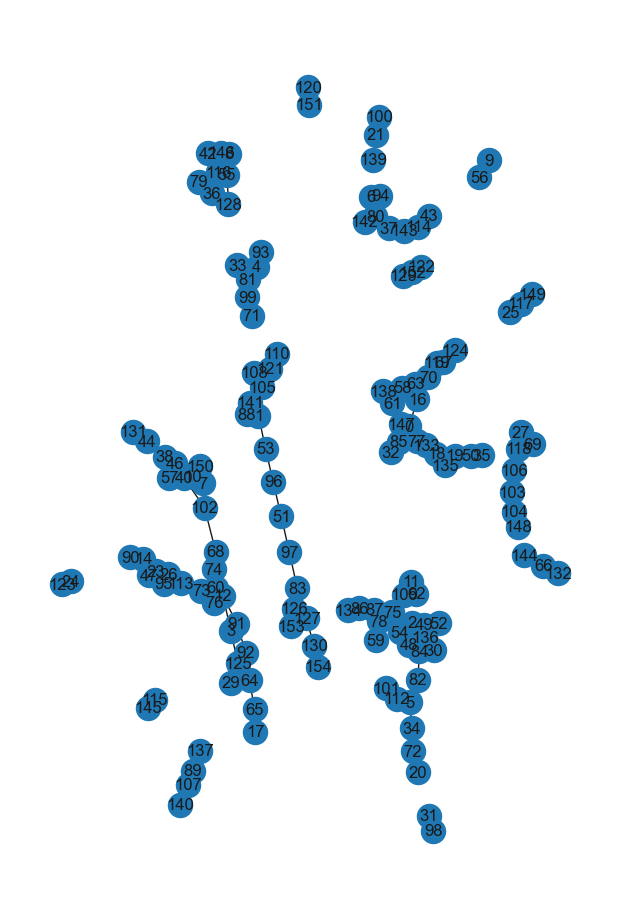

In [81]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 1,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    node_id = i
    latitude = df_buses.lat[i]
    longitude = df_buses.lon[i]
    pos[node_id] = [latitude, longitude]



pos = nx.shell_layout(G)

plt.figure(figsize=(6, 9))
fig1 = nx.draw(G, with_labels=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23492\2463060004.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_buses = n.buses[~n.buses.index.str.contains(r" (H2|battery)$")]
c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


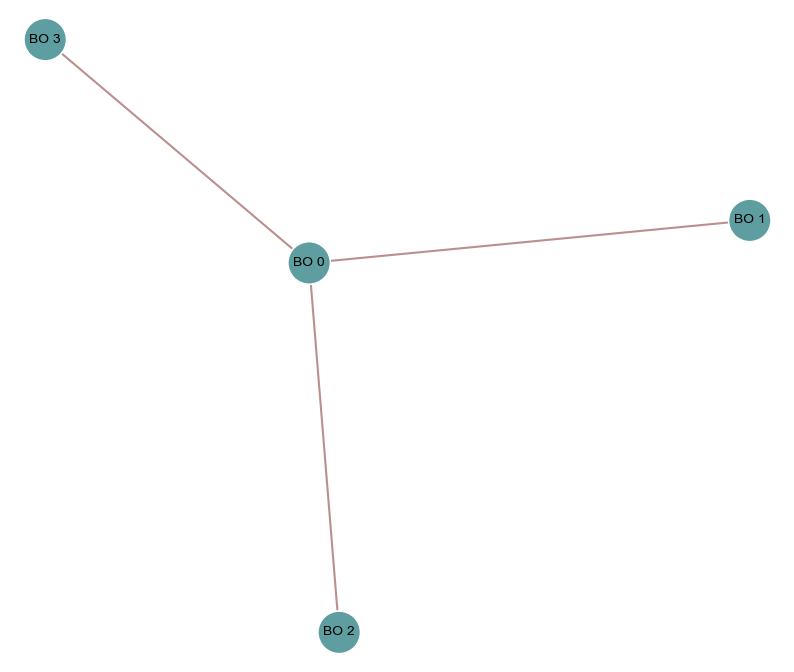

In [82]:
n = n_solve
#load map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

#create subplot with cartopy projection
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw={'projection': ccrs.PlateCarree()})

#plot the shape of the map
n.plot(ax = ax)

# Convert "Bus" index column to string type
filtered_buses = n.buses
filtered_buses.index = filtered_buses.index.astype(str)
filtered_buses = n.buses[~n.buses.index.str.contains(r" (H2|battery)$")]

# Add bus names to the plot
for bus, (lon, lat) in filtered_buses[['x', 'y']].iterrows():
    ax.text(lon, lat, bus, fontsize=10, color='black', ha='center', va='center', transform=ccrs.PlateCarree(), zorder=10)

#add the margin of the country defined in shapes to the orverall plot
#ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

#show the plot
plt.show()



# Solved network

### General info

In [83]:
n = n_solve
n

PyPSA Network
Components:
 - Bus: 12
 - Carrier: 16
 - Generator: 24
 - GlobalConstraint: 1
 - Line: 3
 - Link: 16
 - Load: 4
 - StorageUnit: 3
 - Store: 8
Snapshots: 8760

In [84]:
# ".global_constraints" muestra las restricciones consideradas para el modelo (en el config.yaml solo se tomo en cuenta el limite de emisiones) tonCO2/year

n.global_constraints

,sense,constant,type,investment_period,carrier_attribute,mu
GlobalConstraint,,,,,,
CO2Limit,<=,77500000.0,primary_energy,NaN,co2_emissions,0.0


In [85]:
# estimation of the total emissions from the system in MtonCO2:

emissions = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions) # t/h

#snapshot_weightings provides the number of agregation used for each time step considered (4 hours in this case) and @ ins a multiplier
n.snapshot_weightings.generators @ emissions.sum(axis=1).div(1e6) # Mt


0.701155802076497

In [86]:
##### check why the value does not appear 
#   - It seems that while the model run before, due to restrictions on simulation, proper solving wasn't possible (by increasing tolerances of the solver the model gets actual results)
# Eur/Year

n.objective

112286728.55025029

In [87]:
# Calculo del precio promedio de energia promedio en la red (costo total de operacion)
# Costo promedio de energia = (costos acumulados durante el periodo de analisis) /  [(sumatoria de las cargas variables en el tiempo)*(horas consideradas en cada time frame)

print("Costo total " + str(n.objective))
print("demanda total " + str(n.loads_t.p.sum().sum()*1))

(n.objective)/(n.loads_t.p.sum().sum()*1)

Costo total 112286728.55025029
demanda total 9217867.62726675


12.181421245202364

In [88]:
#promedio del costo marginal en los buses y a lo largo del año

n.buses_t.marginal_price.mean(axis = 1).mean()   ####   .plot(kind = "area")

36.40704058190399

In [89]:
n.buses_t

{'v_mag_pu_set': Empty DataFrame
 Columns: []
 Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00, 2013-01-02 00:00:00, 2013-01-02 01:00:00, 2013-01-02 02:00:00, 2013-01-02 03:00:00, 2013-01-02 04:00:00, 2013-01-02 05:00:00, 2013-01-02 06:00:00, 2013-01-02 07:00:00, 2013-01-02 08:00:00, 2013-01-02 09:00:00, 2013-01-02 10:00:00, 2013-01-02 11:00:00, 2013-01-02 12:00:00, 2013-01-02 13:00:00, 2013-01-02 14:00:00, 2013-01-02 15:00:00, 2013-01-02 16:00:00, 2013-01-02 17:00:00, 2013-01-02 18:00:00, 2013-01-02 19:00:00, 2013-01-02 20:00:00, 

### Spatial temporal resolution

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


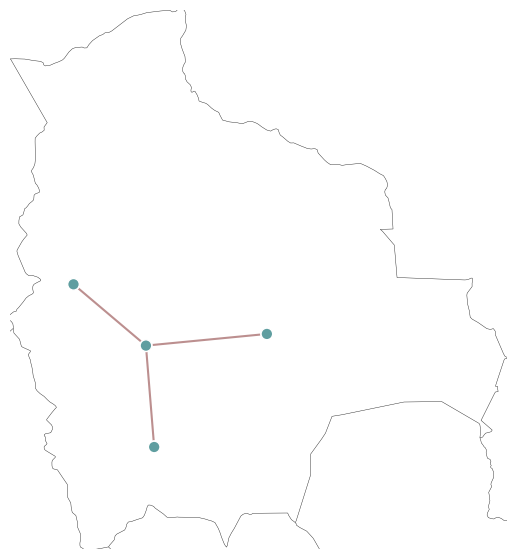

In [90]:
#Resultado grafico de la red electrica ideal (lineas verdes representan expansiones de la red)

#####beacuase all buses are not connected it might be that the problem is not fully solved 
# - Lines used in the model don't consider newer power lines (data bases were not apdated)
# - This is proved by comparing raw lines (all available lines in OSM) and clean lines (processed lines to be used in the model)
# - A linker is required to include new/additional data into the "all_clean_lines.geojson"

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [91]:
n.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-66.283933,-17.925590,Slack,BO 0 OCGT,AC,,None,1.0,0.0,inf,
BO 1,220.0,BO,-63.342114,-17.641621,PQ,,AC,,None,1.0,0.0,inf,
BO 2,220.0,BO,-66.083350,-20.392008,PQ,,AC,,None,1.0,0.0,inf,
BO 3,220.0,BO,-68.045925,-16.434406,PQ,,AC,,None,1.0,0.0,inf,
BO 0 H2,1.0,BO,-66.283933,-17.925590,Slack,,H2,,None,1.0,0.0,inf,
BO 1 H2,1.0,BO,-63.342114,-17.641621,Slack,,H2,,None,1.0,0.0,inf,
BO 2 H2,1.0,BO,-66.083350,-20.392008,Slack,,H2,,None,1.0,0.0,inf,
BO 3 H2,1.0,BO,-68.045925,-16.434406,Slack,,H2,,None,1.0,0.0,inf,
BO 0 battery,1.0,BO,-66.283933,-17.925590,Slack,,battery,,None,1.0,0.0,inf,


In [92]:
#Se muestra el tamaño de la resolucion temporal del modelo - timesteps 
# - Currently the system is working with a toy version of Bolivia to allow faster solving times (4h time aggregation and a little over 5 months acoording the rules in the config.yaml file) 
# - A more complete model should be run eventually with different conditions (higher time resolution) or methods like tsam (https://tsam.readthedocs.io/en/latest/mathematicalBackgroundDoc.html)
#  

len(n.snapshots)

8760

### Overview components

In [93]:
#Imprimir la lista de componentes considerados en el dataframe creado

for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 12 entries
Component 'Carrier' has 16 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 3 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 16 entries
Component 'Load' has 4 entries
Component 'Generator' has 24 entries
Component 'StorageUnit' has 3 entries
Component 'Store' has 8 entries


In [94]:
generadores = n.generators
generadores_hora = n.generators_t.p_max_pu


### Energy balance

In [95]:
# ".stores_t" hace referencia a la energia que se puede almacenar en un bus (se usa para definir otras tecnologias como storage)
# - https://pypsa.readthedocs.io/en/latest/components.html#store

n.stores_t.p.sum()

Store
BO 0 H2         5.329071e-15
BO 1 H2         2.131628e-14
BO 2 H2        -7.105427e-15
BO 3 H2         1.953993e-14
BO 0 battery   -6.494805e-15
BO 1 battery    1.010303e-14
BO 2 battery   -1.110223e-15
BO 3 battery   -5.662137e-15
dtype: float64

In [96]:
n.stores_t.p.sum().sum()

3.5915714846623814e-14

In [97]:
# se imprimen todos los generadores considerados en el modelo

##### check if loadshedding is being used in the config.yaml file, at the solving section 
# - load shedding is represented in the model by the inclution on additional "load" generation/generators 

print(type(n.generators))
print(n.generators.columns)
n.generators

<class 'pandas.core.frame.DataFrame'>
Index(['p_nom_max', 'weight', 'p_nom', 'capital_cost', 'efficiency',
       'p_nom_min', 'marginal_cost', 'bus', 'p_nom_extendable', 'carrier',
       'control', 'p_nom_opt', 'sign', 'build_year', 'min_up_time',
       'min_down_time', 'up_time_before', 'down_time_before', 'type',
       'p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'lifetime', 'committable',
       'start_up_cost', 'shut_down_cost', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down'],
      dtype='object')


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,p_nom_extendable,carrier,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 OCGT,inf,0.000000,0.000000e+00,47234.561404,0.390,0.0,14.394620,BO 0,False,OCGT,Slack,0.000000e+00,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,4.172144e+05,15334.349660,0.000000e+00,109295.569252,1.000,0.0,0.024075,BO 0,True,onwind,,2.515145e-02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 ror,inf,422.830000,4.228300e+02,270940.715283,0.900,0.0,0.010134,BO 0,False,ror,,4.228300e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,5.343454e+05,101919.696038,1.004000e+02,50855.958267,1.000,100.4,0.019429,BO 0,True,solar,,1.004007e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,1.236000e+02,84469.122809,0.500,123.6,12.890041,BO 1,False,CCGT,,1.236000e+02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 OCGT,inf,0.000000,0.000000e+00,47234.561404,0.390,0.0,14.394114,BO 1,False,OCGT,,0.000000e+00,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 biomass,inf,0.000000,9.900000e+01,278015.359506,0.468,99.0,14.968184,BO 1,True,biomass,,9.905727e+01,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 onwind,6.202317e+05,72254.593965,4.500000e+01,109295.569252,1.000,45.0,0.025692,BO 1,True,onwind,,4.500375e+01,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 solar,2.368759e+05,33174.618599,0.000000e+00,50855.958267,1.000,0.0,0.019697,BO 1,True,solar,,5.527578e-02,1.000,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [98]:
#Imprimir solo los generadores de Bolivia

########this is only necessary if several countries are studied at the same time

idx = ['BO' in x for x in n.generators.index]
n.generators.loc[idx,:].head()

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,p_nom_extendable,carrier,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 OCGT,inf,0.000000,0.00,47234.561404,0.39,0.0,14.394620,BO 0,False,OCGT,Slack,0.000000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,4.172144e+05,15334.349660,0.00,109295.569252,1.00,0.0,0.024075,BO 0,True,onwind,,0.025151,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 ror,inf,422.830000,422.83,270940.715283,0.90,0.0,0.010134,BO 0,False,ror,,422.830000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,5.343454e+05,101919.696038,100.40,50855.958267,1.00,100.4,0.019429,BO 0,True,solar,,100.400668,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 1 CCGT,inf,0.000000,123.60,84469.122809,0.50,123.6,12.890041,BO 1,False,CCGT,,123.600000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [99]:
#Imprimir la suma de potencias nominales de los generadores de Bolivia

idx = ['BO' in x for x in n.generators.index]

print(n.generators.loc[idx,:].p_nom.sum())
print(n.generators.loc[idx,:].p_nom_opt.sum())

4000001034.77
4000001793.100415


In [100]:
# Difference between total load and generation
# losses = n.stores_t

n.generators_t.p.sum().sum() - n.loads_t.p.sum().sum()  # - substract storage losses


447635.13266106695

### Generator capacity

In [101]:
gen_cap = n.generators.groupby(["carrier"]).sum()
# gen_cap.to_csv('capacities_by_carrier.csv',index=False)
gen_cap


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23492\278006981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_cap = n.generators.groupby(["carrier"]).sum()


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,NaN,0.000000,1.236000e+02,168938.245618,1.000,123.6,25.780434,0,1.236000e+02,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
OCGT,NaN,0.000000,0.000000e+00,141703.684213,1.170,0.0,43.183196,0,0.000000e+00,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
biomass,NaN,0.000000,9.900000e+01,556030.719012,0.936,99.0,29.934495,2,9.908000e+01,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
geothermal,inf,0.000000,5.500000e+01,334431.013779,0.239,55.0,0.009572,1,3.899580e+02,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
load,NaN,0.000000,4.000000e+09,0.000000,4.000,0.0,4.040597,0,4.000000e+09,0.004,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
oil,inf,0.000000,0.000000e+00,38234.561404,0.393,0.0,130.236490,0,0.000000e+00,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,2.375877e+06,160337.837381,4.500000e+01,437182.277006,4.000,45.0,0.098765,4,4.509236e+01,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
ror,NaN,611.770000,6.117700e+02,812822.145848,2.700,0.0,0.031157,0,6.117700e+02,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
solar,1.869811e+06,330825.879637,1.004000e+02,203423.833068,4.000,100.4,0.079582,4,5.236000e+02,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0


In [102]:
n.stores_t.p.head()

Store,BO 0 H2,BO 1 H2,BO 2 H2,BO 3 H2,BO 0 battery,BO 1 battery,BO 2 battery,BO 3 battery
snapshot,,,,,,,,
2013-01-01 00:00:00,0.184956,0.181483,0.186550,0.180821,0.225723,0.231884,0.209013,0.225037
2013-01-01 01:00:00,0.187903,0.185013,0.189678,0.187062,0.255010,0.258934,0.242356,0.256167
2013-01-01 02:00:00,0.184264,0.180042,0.185502,0.184573,0.324803,0.326821,0.317320,0.331556
2013-01-01 03:00:00,0.049535,0.046358,0.050388,0.045930,-0.003759,-0.004638,-0.003996,-0.002481
2013-01-01 04:00:00,0.049838,0.046839,0.050928,0.045996,0.103897,0.103575,0.105744,0.107840


<AxesSubplot:xlabel='snapshot'>

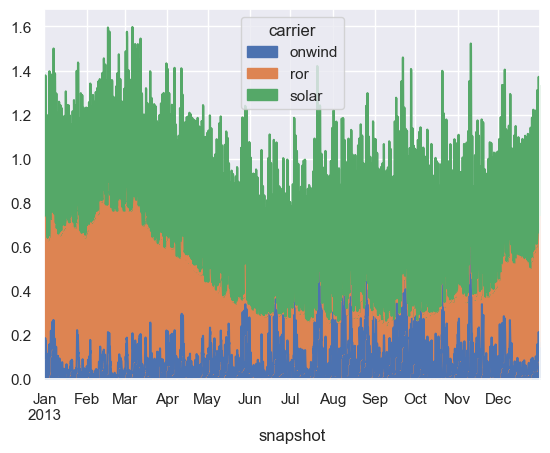

In [103]:
n.generators_t.p_max_pu.groupby(n.generators.carrier, axis=1).mean().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

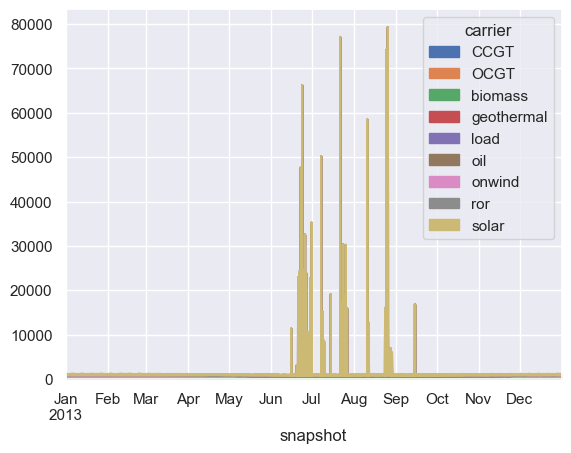

In [104]:
#excluded_carrier = 'load'
#grouped_mean = n.generators_t.p.groupby(n.generators.carrier, axis=1).mean().drop(columns=excluded_carrier)
#grouped_mean.plot(kind='line')

n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

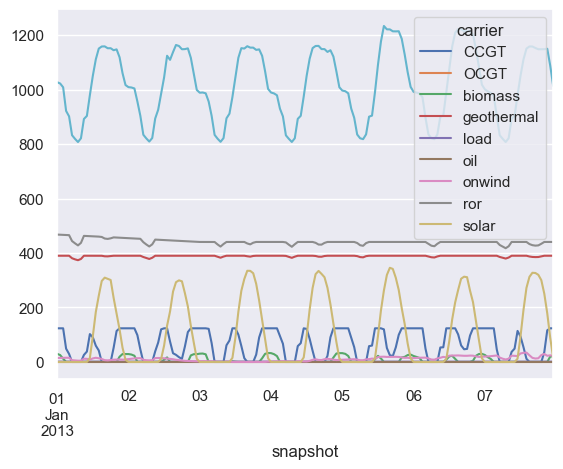

In [105]:
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].plot()
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).mean().plot()

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().plot(kind = "line")

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().sum(axis=1).plot(kind = "line")



In [106]:
# If 0, all renewable capacity potential is used
n.generators.p_nom_max.sum() - n.generators.p_nom_opt.sum()

inf

In [107]:
n.loads_t.p.sum().sum()

9217867.62726675

In [108]:
n.generators_t.p.sum().sum()

9665502.759927817

In [109]:
#### pq la multiplicacion?

n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom.sum()

bus   carrier   
BO 0  OCGT          0.000000e+00
      load          1.000000e+09
      onwind        0.000000e+00
      ror           4.228300e+02
      solar         1.004000e+02
BO 1  CCGT          1.236000e+02
      OCGT          0.000000e+00
      biomass       9.900000e+01
      load          1.000000e+09
      onwind        4.500000e+01
      solar         0.000000e+00
BO 2  CCGT          0.000000e+00
      geothermal    5.500000e+01
      load          1.000000e+09
      onwind        0.000000e+00
      ror           7.550000e+00
      solar         0.000000e+00
BO 3  OCGT          0.000000e+00
      biomass       0.000000e+00
      load          1.000000e+09
      oil           0.000000e+00
      onwind        0.000000e+00
      ror           1.813900e+02
      solar         0.000000e+00
Name: p_nom, dtype: float64

### Lines

In [110]:
n.lines

,bus0,bus1,length,type,s_max_pu,s_nom,capital_cost,num_parallel,s_nom_extendable,s_nom_min,x,r,b,build_year,carrier,x_pu_eff,r_pu_eff,s_nom_opt,v_nom,g,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,BO 0,BO 1,391.346902,Al/St 240/40 4-bundle 380.0,0.7,1966.224077,14907.865551,1.157895,True,1138.340255,83.143428,10.139442,0.001965,0,AC,0.001718,0.000209,1138.365297,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,BO 0,BO 2,343.826310,Al/St 240/40 4-bundle 380.0,0.7,3932.448154,13098.400254,2.315789,True,2276.680510,36.523731,4.454114,0.003452,0,AC,0.000755,0.000092,2276.683536,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,BO 0,BO 3,312.570567,Al/St 240/40 4-bundle 380.0,0.7,1966.224077,11909.449175,1.157895,True,1138.340255,66.407038,8.098419,0.001569,0,AC,0.001372,0.000167,1138.392234,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [111]:
print(type(n.lines_t))
print(n.lines_t)

<class 'pypsa.descriptors.Dict'>
{'s_max_pu': Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00, 2013-01-02 00:00:00, 2013-01-02 01:00:00, 2013-01-02 02:00:00, 2013-01-02 03:00:00, 2013-01-02 04:00:00, 2013-01-02 05:00:00, 2013-01-02 06:00:00, 2013-01-02 07:00:00, 2013-01-02 08:00:00, 2013-01-02 09:00:00, 2013-01-02 10:00:00, 2013-01-02 11:00:00, 2013-01-02 12:00:00, 2013-01-02 13:00:00, 2013-01-02 14:00:00, 2013-01-02 15:00:00, 2013-01-02 16:00:00, 2013-01-02 17:00:00, 2013-01-02 18:00:00, 2013-01-02 19:0

In [112]:
n.lines_t.p0.max()
n.lines_t.p0.min()

Line
1    -80.896863
2   -509.205364
3     96.144247
dtype: float64

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='snapshot'>

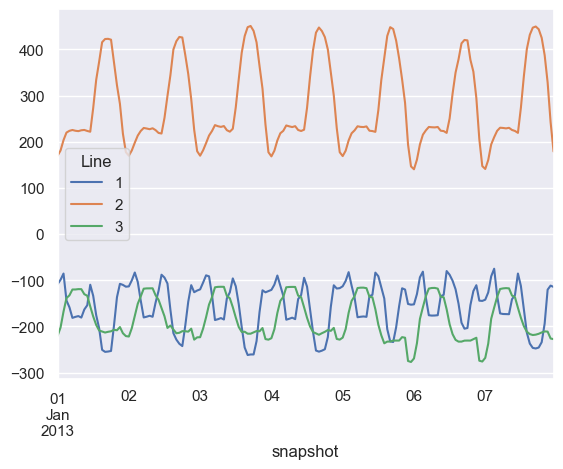

In [113]:
print(type(n.lines_t.p0) and type(n.lines_t.p1))

n.lines_t.p1.loc["2013-01-01":"2013-01-07",:].plot(kind = "line")

### Demand

In [114]:
print(type(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()))

print(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum())

<class 'pandas.core.series.Series'>
bus
BO 0    1.000001e+09
BO 1    1.000000e+09
BO 2    1.000001e+09
BO 3    1.000000e+09
Name: p_nom_opt, dtype: float64


<AxesSubplot:xlabel='snapshot'>

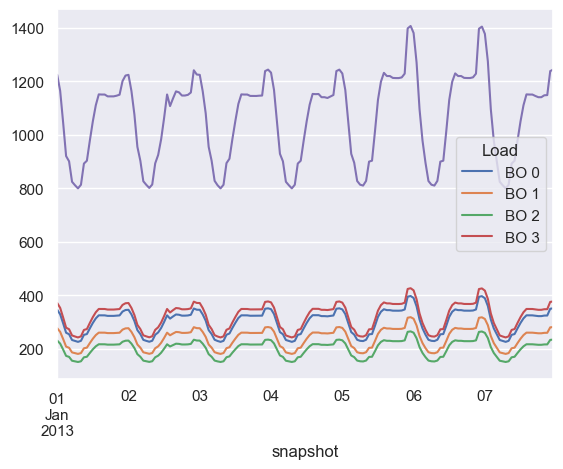

In [115]:
#n.loads_t.p_set.loc["2013-01-01":"2013-12-30","BO0 0"].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()


Load
BO 0    2.603167e+06
BO 1    2.084545e+06
BO 2    1.736455e+06
BO 3    2.793700e+06
dtype: float64
9217867.62726675


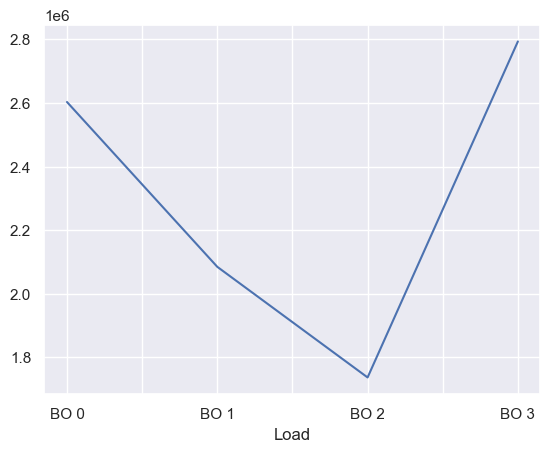

In [116]:
print(n.loads_t.p_set.sum())

n.loads_t.p_set.sum().plot()

print(n.loads_t.p_set.sum().sum())

In [117]:
a = n.loads_t.p_set.sum().rename("load").rename_axis("bus")
a.rename("load", inplace=True)
a.rename_axis("bus", inplace=True)
a

bus
BO 0    2.603167e+06
BO 1    2.084545e+06
BO 2    1.736455e+06
BO 3    2.793700e+06
Name: load, dtype: float64

In [118]:
n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()

###### potencia maxima?
#n.generators.iloc[:, :].groupby(["bus"]).p_max_pu.sum()

bus
BO 0    1.000001e+09
BO 1    1.000000e+09
BO 2    1.000001e+09
BO 3    1.000000e+09
Name: p_nom_opt, dtype: float64

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


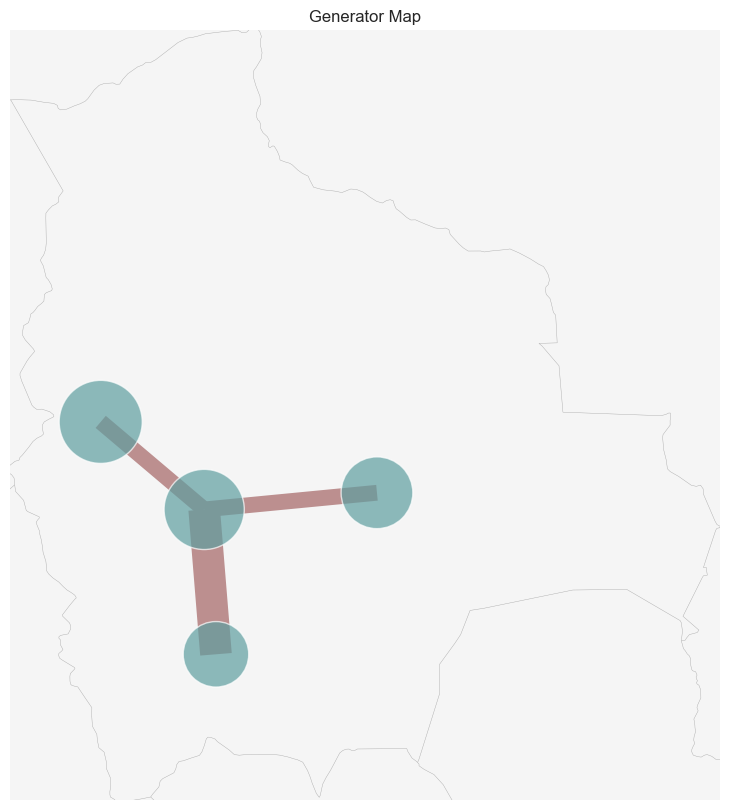

In [119]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={
        "projection": ccrs.PlateCarree()
    },  # PlateCarree(default), Mercator, Orthographic
)

# loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(
    margin=0.1,
    ax=ax,
    geomap=True,  #'10m' leads to a beautiful high resolution map
    projection=None,
    bus_colors="cadetblue",
    bus_alpha=0.7,
    bus_sizes=normalize_node_size(
        n.loads_t.p_set.sum().rename("load").rename_axis("bus")
    )*0.5,  # n.loads_t.p_set.sum().rename("load").rename_axis("bus")*.0000003,
    bus_cmap=None,
    line_colors="rosybrown",
    link_colors="darkseagreen",  # loading
    transformer_colors="orange",
    line_widths=n.lines.s_nom_opt / 1e2,
    link_widths=1.5,
    transformer_widths=1.5,
    line_cmap=None,
    link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
    transformer_cmap=None,
    flow=None,
    branch_components=None,
    layouter=None,
    title="Generator Map",
    boundaries=None,
    geometry=False,
    jitter=None,
    color_geomap=True,
)  # None or True

ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [120]:
# backup
gen_serie = n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
load_serie = n.loads_t.p_set.sum().rename("load").rename_axis("bus")

load_serie = pd.Series(
    load_serie.values,
    index=pd.MultiIndex.from_tuples([(id, "AC load") for id in load_serie.index]),
)

tot_serie = pd.concat([gen_serie, load_serie])  # .groupby(['bus', 'carrier']).sum()

pd.concat([gen_serie, load_serie])

bus   carrier   
BO 0  OCGT          0.000000e+00
      load          1.000000e+09
      onwind        2.515145e-02
      ror           4.228300e+02
      solar         1.004007e+02
BO 1  CCGT          1.236000e+02
      OCGT          0.000000e+00
      biomass       9.905727e+01
      load          1.000000e+09
      onwind        4.500375e+01
      solar         5.527578e-02
BO 2  CCGT          0.000000e+00
      geothermal    3.899580e+02
      load          1.000000e+09
      onwind        4.332557e-02
      ror           7.550000e+00
      solar         4.230828e+02
BO 3  OCGT          0.000000e+00
      biomass       2.273621e-02
      load          1.000000e+09
      oil           0.000000e+00
      onwind        2.013840e-02
      ror           1.813900e+02
      solar         6.128573e-02
BO 0  AC load       2.603167e+06
BO 1  AC load       2.084545e+06
BO 2  AC load       1.736455e+06
BO 3  AC load       2.793700e+06
dtype: float64

### Plot of Average Marginal Price

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


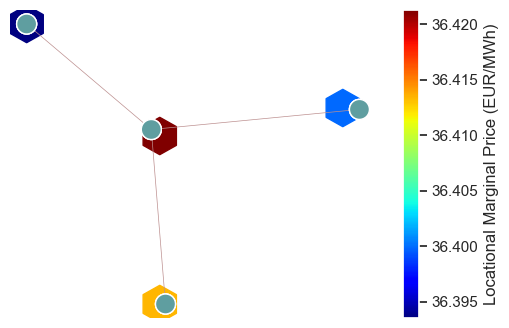

In [121]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

n = n_solve

now = n.snapshots[1800]  ##one specific time

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(7, 4)

n.plot(ax=ax, line_widths=pd.Series(0.5, n.lines.index))
plt.hexbin(
    n.buses.x,
    n.buses.y,
    gridsize=10,
    # C=n.buses_t.marginal_price.loc[now], #at one time (previous set up by scigrid)
    C=n.buses_t.marginal_price.sum()
    / len(n.snapshots[:]),  # Marginal price averaged over the whole year (My version)
    # - shows in which regions electricity will be cheap and where el. intensive companies should be placed.
    cmap=plt.cm.jet,
)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label("Locational Marginal Price (EUR/MWh)")

### Storage

In [122]:
n.stores

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,marginal_cost,build_year,e_nom_opt,type,e_nom,e_nom_min,e_nom_max,e_min_pu,e_max_pu,e_initial,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,standing_loss,lifetime
Store,,,,,,,,,,,,,,,,,,,,,,
BO 0 H2,BO 0 H2,H2,True,True,796.283619,0.010454,0,49.614447,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 1 H2,BO 1 H2,H2,True,True,796.283619,0.010169,0,49.884856,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 2 H2,BO 2 H2,H2,True,True,796.283619,0.010187,0,49.898384,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 3 H2,BO 3 H2,H2,True,True,796.283619,0.009441,0,50.141632,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 0 battery,BO 0 battery,battery,True,True,15877.883774,0.009795,0,2.011488,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 1 battery,BO 1 battery,battery,True,True,15877.883774,0.010678,0,2.013403,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 2 battery,BO 2 battery,battery,True,True,15877.883774,0.009097,0,2.016125,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf
BO 3 battery,BO 3 battery,battery,True,True,15877.883774,0.010609,0,2.032114,,0.0,0.0,inf,0.0,1.0,0.0,False,True,0.0,0.0,1.0,0.0,inf


<AxesSubplot:xlabel='snapshot'>

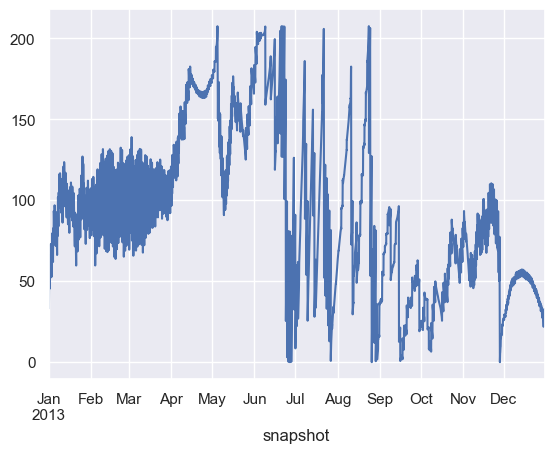

In [123]:
n.stores_t.e.loc["2013-01-01":"2013-12-30"].sum(axis=1).plot()

In [124]:
n.links.iloc[:].groupby(["carrier"]).p_nom_opt.sum()

carrier
H2 electrolysis        4.120835
H2 fuel cell          36.413488
battery charger        3.637383
battery discharger     4.041537
Name: p_nom_opt, dtype: float64

In [125]:
n.stores_t.e.sum()

Store
BO 0 H2         197156.367127
BO 1 H2         198291.465121
BO 2 H2         198383.709136
BO 3 H2         199363.266717
BO 0 battery      8481.821555
BO 1 battery      8493.948510
BO 2 battery      8503.308038
BO 3 battery      8579.728543
dtype: float64

### Storage_units (hydro reservoir)

In [126]:
n.storage_units

,p_min_pu,carrier,cyclic_state_of_charge,efficiency_dispatch,efficiency_store,max_hours,capital_cost,p_nom,bus,marginal_cost,build_year,p_nom_opt,control,type,p_nom_extendable,p_nom_min,p_nom_max,p_max_pu,p_set,q_set,sign,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 hydro,0.0,hydro,True,0.9,0.0,1300.0,160627.143522,475.80,BO 0,0.009171,0,475.80,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 2 hydro,0.0,hydro,True,0.9,0.0,1300.0,160627.143522,7.46,BO 2,0.009917,0,7.46,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 3 hydro,0.0,hydro,True,0.9,0.0,1300.0,160627.143522,66.06,BO 3,0.010545,0,66.06,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0


<AxesSubplot:xlabel='snapshot'>

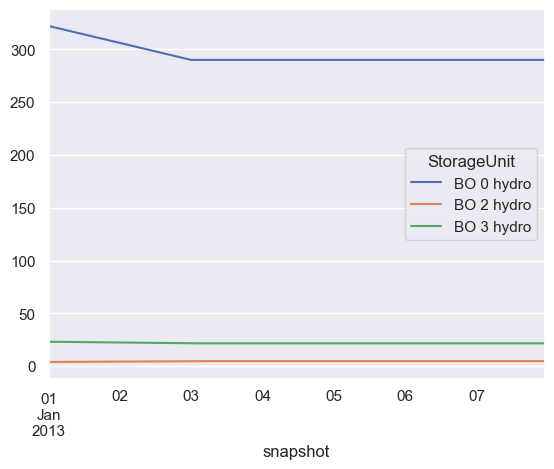

In [127]:

n.storage_units_t.inflow.loc["2013-01-01":"2013-01-07"].plot()

In [128]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-01"].sum(axis=0)

StorageUnit
BO 0 hydro    658.018685
BO 2 hydro     43.101569
BO 3 hydro     57.656979
dtype: float64

<AxesSubplot:xlabel='snapshot'>

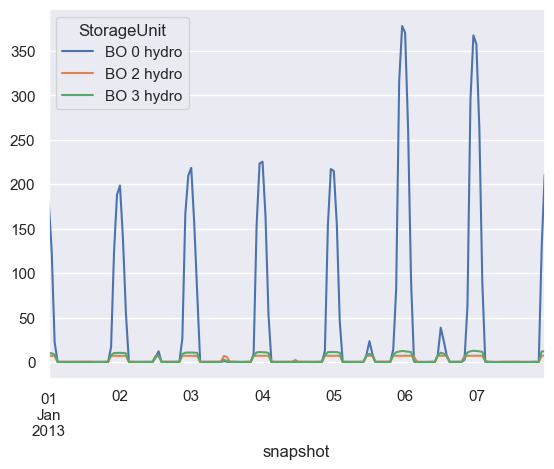

In [129]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].plot()

In [130]:
hydro_serie = n.storage_units.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
hydro_serie

bus   carrier
BO 0  hydro      475.80
BO 2  hydro        7.46
BO 3  hydro       66.06
Name: p_nom_opt, dtype: float64

In [131]:
hydro_serie.sum()

549.3199999999999

In [132]:
n.storage_units_t.p.sum().sum()

1117470.1268676757

# Plot Load + Generators + Storage_Units

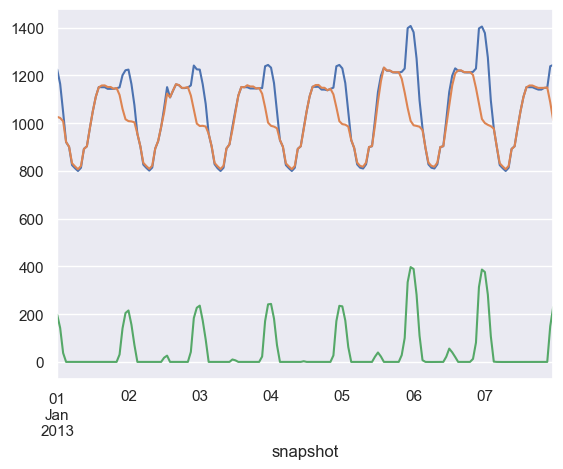

In [133]:
total_load = n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()

gen_units = n.generators_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

res_units = n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

In [134]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                6.165563e-01         2.754576e+07   
            Combined-Cycle Gas     8.175107e-01         1.044038e+07   
            Geothermal             9.959415e-01         1.304141e+08   
            Oil                             NaN         0.000000e+00   
            Onshore Wind           1.417618e-01         4.928395e+06   
            Open-Cycle Gas                  NaN         0.000000e+00   
            Run of River           4.319740e-01         1.657534e+08   
            Solar                  1.987337e-01         2.662818e+07   
            load                   4.453542e-08         0.000000e+00   
Line        AC                     1.290711e-01         6.034913e+07   
Link        H2 electrolysis        2.638503e-01         2.010737e+05   
            H2 fuel cell           2.388757e-02         8.906061e+05   
            battery charger        1.716833e-01         1.400673e+05   
            battery discharger     1.390636e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        2.322236e-01         8.823570e+07   
Store       Battery Storage        4.815966e-01         1.281842e+05   
            Hydrogen Storage       4.537820e-01         1.588899e+05   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                0.000000        9.900000e+01   
            Combined-Cycle Gas     0.000000        1.236000e+02   
            Geothermal             0.000000        5.500000e+01   
            Oil                    0.000000        0.000000e+00   
            Onshore Wind           0.383389        4.500000e+01   
            Open-Cycle Gas         0.000000        0.000000e+00   
            Run of River           3.679554        6.117700e+02   
            Solar                  2.529820        1.004000e+02   
            load                   0.000000        4.000000e+09   
Line        AC                          NaN        7.864896e+03   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        5.493200e+02   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        9.143824e+02      9.908000e+01   
            Combined-Cycle Gas             1.302465e+03      1.236000e+02   
            Geothermal                     3.717485e+00      3.899580e+02   
            Oil                            0.000000e+00      0.000000e+00   
            Onshore Wind                   1.642265e-01      4.509236e+01   
            Open-Cycle Gas                 0.000000e+00      0.000000e+00   
            Run of River                   2.707555e+00      6.117700e+02   
            Solar                          2.099571e+00      5.236000e+02   
            load                           1.798346e+02      4.000000e+09   
Line        AC                                      NaN      4.553441e+03   
Link        H2 electrolysis                0.000000e+00      4.120835e+00   
            H2 fuel cell                   0.000000e+00      3.641349e+01   
            battery charger                0.000000e+00      3.637383e+00   
            battery discharger             0.000000e+00      4.041537e+00   
Load        -     

In [135]:
load_shedding = n.generators_t.p.loc["2013-01-01":"2014-01-01"].groupby(n.generators.carrier, axis=1).sum()["load"]
load_shedding.sum()

1560521.122723128

<AxesSubplot:xlabel='snapshot'>

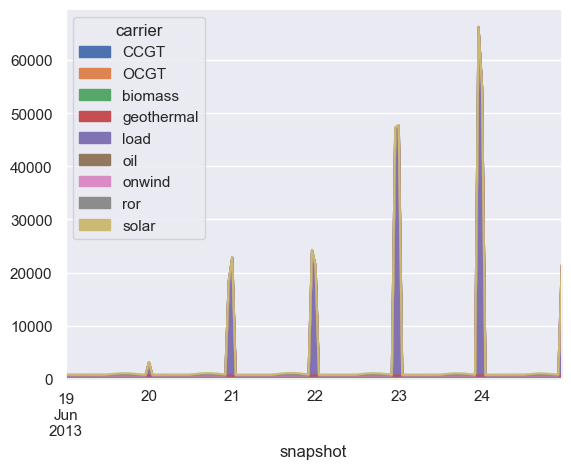

In [136]:

n.generators_t.p.loc["2013-06-19":"2013-06-24"].groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

In [137]:
print("\n")
print("Average cost: "+str(n.objective/n.loads_t.p.sum().sum())+"[€/MWh]")
        

loads=n.generators[n.generators.carrier=="load"]

print("Load carrier (load shedding) : "+str(n.generators_t.p[loads.index].sum().sum()/1e6)+" TWh")

battery=n.stores_t.p.groupby(n.stores.carrier, axis=1).sum()["battery"]

i=0
nbattery = []
pbattery =[]
for i in battery:
    if i < 0:
        nbattery.append(i)
    else:
        nbattery.append(0) 
for i in battery:
    if i > 0:
        pbattery.append(i)
    else:
        pbattery.append(0)

        
        
H2=n.stores_t.p.groupby(n.stores.carrier, axis=1).sum()["H2"]

i=0
nH2 = []
pH2 =[]
for i in H2:
    if i < 0:
        nH2.append(i)
    else:
        nH2.append(0) 
for i in H2:
    if i > 0:
        pH2.append(i)
    else:
        pH2.append(0)
        
n.generators = n.generators[n.generators.carrier != "load"]
n.generators_t.p = n.generators_t.p[n.generators.index]
p_cap_gen=(n.generators.p_nom_opt.sum().sum()+n.storage_units.p_nom_opt.sum().sum())
p_cap_bat=(n.stores.e_nom_opt.sum().sum()/6)
data_p0 = n.links_t.p0
data_p1 = n.links_t.p1


print("Total installed power :"+str(p_cap_gen/1e3)+" GW")
print("Total production : "+str((n.generators_t.p.sum().sum()+n.storage_units_t.p.sum().sum())/1e6) +"TWh")


print("Total energy stored: "+str(np.sum(pbattery)/1e6+np.sum(pH2)/1e6) +"TWh")

print("Total installed power battery: "+str(p_cap_bat/1e3) +" GW")

print("Losts in the batteries:"+ str((data_p0.sum().sum()+data_p1.sum().sum())/1e6)+"TWh")
print("\n")

renewable_carriers = ["onwind", "solar", "ror", "biomass", "geothermal"]
renewable = n.generators[n.generators.carrier.isin(renewable_carriers)]
print("Total production per renewable: "+str(n.storage_units_t.p.sum().sum()/1e6+n.generators_t.p[renewable.index].sum().sum()/1e6) +"TWh")
print("\n")

#print("Production-lost : "+str((n.generators_t.p.sum().sum()+n.storage_units_t.p.sum().sum())/1e6-n.generators_t.p[loads.index].sum().sum()/1e6-(data_p0.sum().sum()+data_p1.sum().sum())/1e6) +"TWh")


print("Percentage of battery installed:"+str(p_cap_bat/p_cap_gen*100)+"%")
print("Total demand : "+str(n.loads_t.p.sum().sum()/1e6) +"TWh")



Average cost: 12.181421245202364[€/MWh]
Load carrier (load shedding) : 1.560521122723128 TWh
Total installed power :2.342420414954969 GW
Total production : 9.222451764072366TWh
Total energy stored: 0.010432350090821971TWh
Total installed power battery: 0.03460207483833888 GW
Losts in the batteries:0.006144580151035403TWh


Total production per renewable: 8.33730351677901TWh


Percentage of battery installed:1.4771931894644144%
Total demand : 9.21786762726675TWh


<AxesSubplot:xlabel='snapshot'>

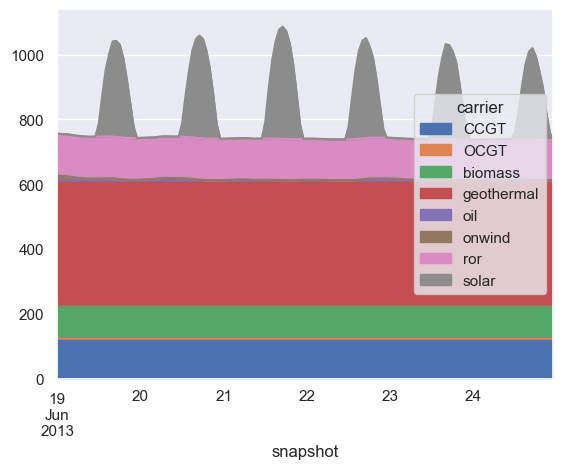

In [138]:

n.generators_t.p.loc["2013-06-19":"2013-06-24"].groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")